In [134]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [135]:
#Reading the csv file
df=pd.read_csv(r"MLfrauddetection.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.00,0.00,0,0
2,1,TRANSFER,2806.00,C1420196421,2806.0,0.0,C972765878,0.00,0.00,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.00,0.00,1,0
4,1,TRANSFER,20128.00,C137533655,20128.0,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,1,CASH_OUT,135357.16,C778337881,0.0,0.0,C1816757085,11300000.00,10700000.00,0,0
2995,1,CASH_OUT,422125.99,C742568993,0.0,0.0,C716083600,2218454.85,2444985.19,0,0
2996,1,CASH_OUT,57643.24,C1373861264,0.0,0.0,C1096283470,66948.88,0.00,0,0
2997,1,PAYMENT,11261.67,C233519968,7004.0,0.0,M7346738,0.00,0.00,0,0


In [136]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [137]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [138]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.00,0.00,0
2,1,TRANSFER,2806.00,C1420196421,2806.0,0.0,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.0,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
2994,1,CASH_OUT,135357.16,C778337881,0.0,0.0,C1816757085,11300000.00,10700000.00,0
2995,1,CASH_OUT,422125.99,C742568993,0.0,0.0,C716083600,2218454.85,2444985.19,0
2996,1,CASH_OUT,57643.24,C1373861264,0.0,0.0,C1096283470,66948.88,0.00,0
2997,1,PAYMENT,11261.67,C233519968,7004.0,0.0,M7346738,0.00,0.00,0


In [139]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [140]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2994,1,CASH_OUT,135357.16,C778337881,0.0,0.0,C1816757085,11300000.00,10700000.00,0
2995,1,CASH_OUT,422125.99,C742568993,0.0,0.0,C716083600,2218454.85,2444985.19,0
2996,1,CASH_OUT,57643.24,C1373861264,0.0,0.0,C1096283470,66948.88,0.00,0
2997,1,PAYMENT,11261.67,C233519968,7004.0,0.0,M7346738,0.00,0.00,0
2998,1,TRANSFER,416106.78,C967460257,12283.0,0.0,C1831477404,291247.23,247063.16,0


In [141]:
#correlation
df.corr()

<ipython-input-141-a46c601d5826>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.377305,0.122713,-0.185162,-0.052751,0.013438,0.804520
amount,0.377305,1.000000,0.624664,-0.031781,0.040144,0.271650,0.382728
oldbalanceOrg,0.122713,0.624664,1.000000,0.753048,0.088314,0.204079,0.093553
newbalanceOrig,-0.185162,-0.031781,0.753048,1.000000,0.128973,0.086946,-0.230808
oldbalanceDest,-0.052751,0.040144,0.088314,0.128973,1.000000,0.828780,-0.060470
newbalanceDest,0.013438,0.271650,0.204079,0.086946,0.828780,1.000000,0.006171
isFraud,0.804520,0.382728,0.093553,-0.230808,-0.060470,0.006171,1.000000


<ipython-input-142-b0ca697fdc72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

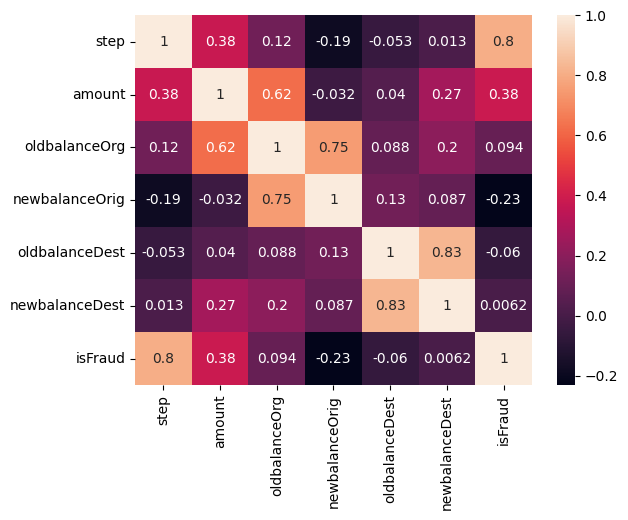

In [142]:
#Heatmap
sns.heatmap(df.corr(),annot=True)

In [143]:
df["isFraud"].value_counts()

0    1862
1    1137
Name: isFraud, dtype: int64

In [144]:
df.loc[df["isFraud"]==0,"isFraud"] = "is not Fraud"
df.loc[df["isFraud"]==1,"isFraud"] = "is Fraud"

In [145]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.00,0.00,is Fraud
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.00,0.00,is not Fraud
2,1,TRANSFER,2806.00,C1420196421,2806.0,0.0,C972765878,0.00,0.00,is Fraud
3,1,CASH_OUT,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.00,0.00,is Fraud
4,1,TRANSFER,20128.00,C137533655,20128.0,0.0,C1848415041,0.00,0.00,is Fraud
...,...,...,...,...,...,...,...,...,...,...
2994,1,CASH_OUT,135357.16,C778337881,0.0,0.0,C1816757085,11300000.00,10700000.00,is not Fraud
2995,1,CASH_OUT,422125.99,C742568993,0.0,0.0,C716083600,2218454.85,2444985.19,is not Fraud
2996,1,CASH_OUT,57643.24,C1373861264,0.0,0.0,C1096283470,66948.88,0.00,is not Fraud
2997,1,PAYMENT,11261.67,C233519968,7004.0,0.0,M7346738,0.00,0.00,is not Fraud


In [146]:
#shape of csv data
df.shape

(2999, 10)

In [147]:
df.drop(["nameOrig","nameDest"], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [148]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,is Fraud
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,is not Fraud
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,is Fraud
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,is Fraud
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,is Fraud


### Checking for null values

In [149]:
#Finding null values
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2999 non-null   int64  
 1   type            2999 non-null   object 
 2   amount          2999 non-null   float64
 3   oldbalanceOrg   2999 non-null   float64
 4   newbalanceOrig  2999 non-null   float64
 5   oldbalanceDest  2999 non-null   float64
 6   newbalanceDest  2999 non-null   float64
 7   isFraud         2999 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 187.6+ KB


### Handling Outliers

In [151]:
q1 = np.quantile(df["amount"],0.25)
q3 = np.quantile(df["amount"],0.75)

IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print("q1: ",q1)
print("q3: ",q3)
print("IQR: ",IQR)
print("upper_bound: ",upper_bound)
print("lower_bound: ",lower_bound)
print("Skewed data: ",len(df[df["amount"]>upper_bound]))
print("Skewed data: ",len(df[df["amount"]<lower_bound]))

q1:  6825.955
q3:  335857.64
IQR:  329031.685
upper_bound:  829405.1675
lower_bound:  -486721.57249999995
Skewed data:  414
Skewed data:  0


In [152]:
#TO handle outliers transformation techniques are used
def transformationPlot (feature):
    plt.figure(figsize=(12,5))
    plt.subplot (1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

In [153]:
df["amount"]=np.log(df["amount"])

In [154]:
# Object Data Labelencoding

from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df["type"]=la.fit_transform(df["type"])

In [155]:
df["type"].value_counts()
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,4,5.198497,181.0,0.0,0.00,0.00,is Fraud
1,1,1,5.198497,181.0,0.0,21182.00,0.00,is not Fraud
2,1,4,7.939515,2806.0,0.0,0.00,0.00,is Fraud
3,1,1,7.939515,2806.0,0.0,26202.00,0.00,is Fraud
4,1,4,9.909867,20128.0,0.0,0.00,0.00,is Fraud
...,...,...,...,...,...,...,...,...
2994,1,1,11.815672,0.0,0.0,11300000.00,10700000.00,is not Fraud
2995,1,1,12.953059,0.0,0.0,2218454.85,2444985.19,is not Fraud
2996,1,1,10.962028,0.0,0.0,66948.88,0.00,is not Fraud
2997,1,3,9.329160,7004.0,0.0,0.00,0.00,is not Fraud


In [156]:
# Dividing the dataset into dependent and independent y and x respectively
x=df.drop("isFraud",axis=1)
y=df["isFraud"]

In [157]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,4,5.198497,181.0,0.0,0.00,0.00
1,1,1,5.198497,181.0,0.0,21182.00,0.00
2,1,4,7.939515,2806.0,0.0,0.00,0.00
3,1,1,7.939515,2806.0,0.0,26202.00,0.00
4,1,4,9.909867,20128.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2994,1,1,11.815672,0.0,0.0,11300000.00,10700000.00
2995,1,1,12.953059,0.0,0.0,2218454.85,2444985.19
2996,1,1,10.962028,0.0,0.0,66948.88,0.00
2997,1,3,9.329160,7004.0,0.0,0.00,0.00


In [158]:
y

0           is Fraud
1       is not Fraud
2           is Fraud
3           is Fraud
4           is Fraud
            ...     
2994    is not Fraud
2995    is not Fraud
2996    is not Fraud
2997    is not Fraud
2998    is not Fraud
Name: isFraud, Length: 2999, dtype: object

### Train test split

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Model Building

## 1.RandomForest classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.99

In [161]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [162]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,265,5
is not Fraud,1,329


In [163]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       1.00      0.98      0.99       270
is not Fraud       0.99      1.00      0.99       330

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



# 2.Decision Tree classifier

In [164]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9916666666666667

In [165]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [166]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,266,4
is not Fraud,1,329


In [167]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      0.99       270
is not Fraud       0.99      1.00      0.99       330

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



# 3.ExtraTreesClassifier

In [168]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

0.9916666666666667

In [169]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [170]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,266,4
is not Fraud,1,329


In [171]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      0.99       270
is not Fraud       0.99      1.00      0.99       330

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



# 4.Support vector Machine classifier

In [172]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)

y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.8166666666666667

In [173]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.8299291371404752

In [174]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,161,109
is not Fraud,1,329


In [175]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.99      0.60      0.75       270
is not Fraud       0.75      1.00      0.86       330

    accuracy                           0.82       600
   macro avg       0.87      0.80      0.80       600
weighted avg       0.86      0.82      0.81       600



In [176]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [177]:
from sklearn.preprocessing import LabelEncoder

la= LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [178]:
y_test1=la.transform(y_test)

In [179]:
y_test1=la.transform(y_test)

In [180]:
y_test1

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [181]:
y_train1

array([1, 1, 0, ..., 1, 1, 1])

# Xgboost Classifier

In [182]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9916666666666667

In [183]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

1.0

In [184]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,266,4
1,1,329


In [185]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       270
           1       0.99      1.00      0.99       330

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



# Compare models

In [186]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc", accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc", accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc", accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc", accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc", accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc", accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svc", accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1", accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1", accuracy_score(y_test_predict5,y_test1))

In [187]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.99
train accuracy for dtc 1.0
test accuracy for dtc 0.9916666666666667
train accuracy for etc 1.0
test accuracy for etc 0.9916666666666667
train accuracy for svc 0.8299291371404752
test accuracy for svc 0.8166666666666667
train accuracy for xgb1 1.0
test accuracy for xgb1 0.9916666666666667


In [189]:
import pickle
pickle.dump(rfc,open("model.pkl","wb"))